In [1]:
import pandas as pd
import numpy as np
import sklearn
import pycaret

In [2]:
data = pd.read_csv('./Data/bank-additional-full.csv', sep=';')
data.shape

(41188, 21)

In [29]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [30]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


<AxesSubplot:>

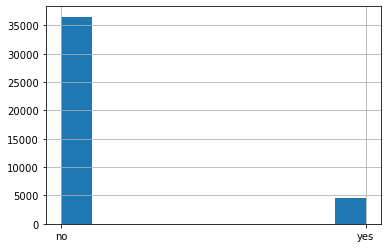

In [31]:
# data is somewhat imbalanced
data['y'].hist()

In [32]:
# take a look at non-numeric data
data.select_dtypes(exclude="number").head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [33]:
# look at nique values
# also, take a look at top-frequent data and their frequencey (how skew is each field)
data.describe(exclude="number")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [34]:
# how about numerical data?
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [35]:
# no duplicate values were detected
n_duplicates = data.duplicated().sum()
print(f"number of unique duplicates in database are {n_duplicates}")

number of unique duplicates in database are 12


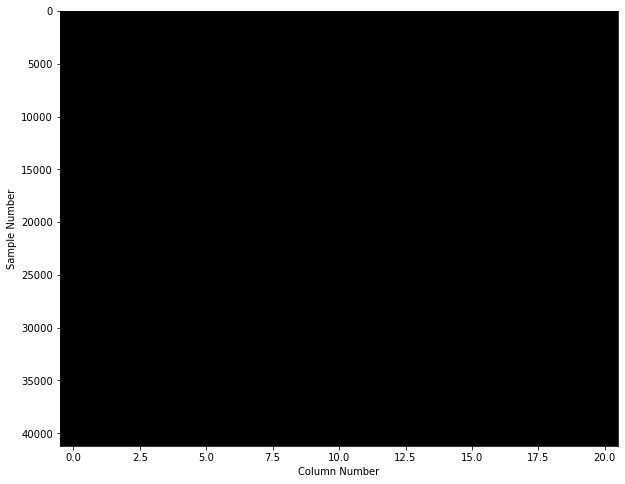

In [36]:
# check for missing values
# if there are any, we would have to find a reasoable way to replace or impute
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(data.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

In [45]:
# according to documentation of dataset, 'unknown' values are to be treated as missing values
# check how many aremissing for each categorical fied
cat_fields = list(data.select_dtypes(exclude="number"))
for i in cat_fields:
    print(f"number of 'unknwon' values for field {i} is: {len(np.where(data[i]=='unknown')[0])}")
    
# not a lot of missing values here, might have to combine with other categories or treat as separate
# field

number of 'unknwon' values for field job is: 330
number of 'unknwon' values for field marital is: 80
number of 'unknwon' values for field education is: 1731
number of 'unknwon' values for field default is: 8597
number of 'unknwon' values for field housing is: 990
number of 'unknwon' values for field loan is: 990
number of 'unknwon' values for field contact is: 0
number of 'unknwon' values for field month is: 0
number of 'unknwon' values for field day_of_week is: 0
number of 'unknwon' values for field poutcome is: 0
number of 'unknwon' values for field y is: 0


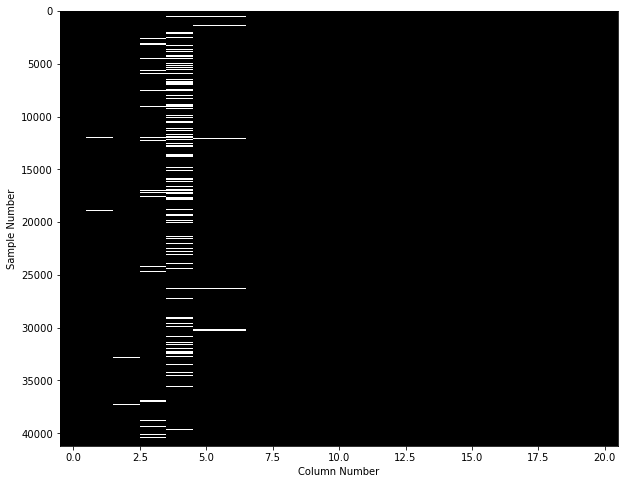

In [83]:
# visualize missing values
dataT = data.copy()
dataT = dataT.replace('unknown', np.nan)
plt.figure(figsize=(10, 8))
plt.imshow(dataT.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

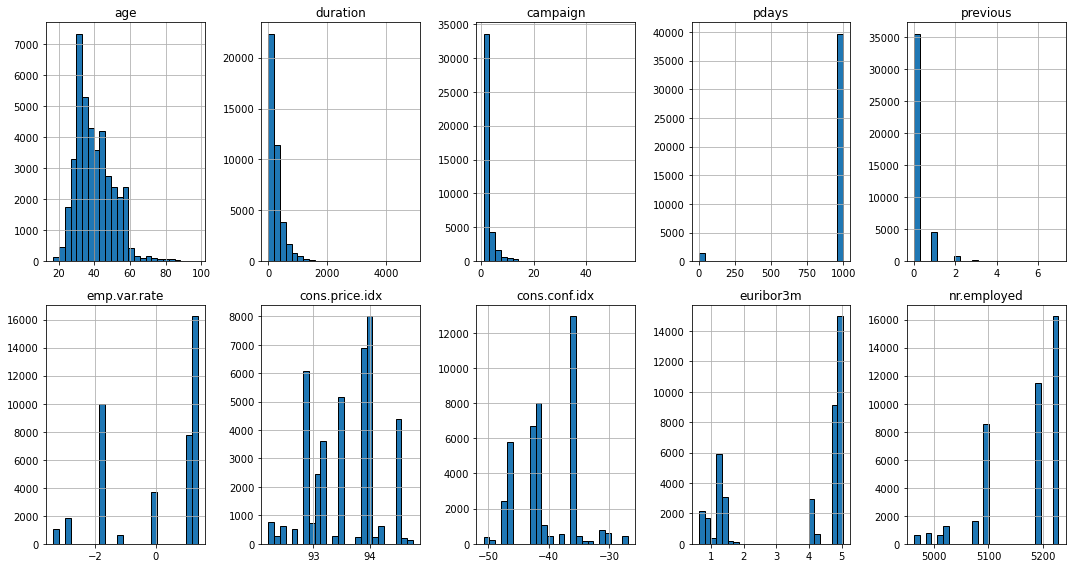

In [38]:
data.hist(bins=25, figsize=(15, 8), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

# looks like 'pdays' fields are not very useful as majority clients were contacted for the first time


{'whiskers': [<matplotlib.lines.Line2D at 0x1b7d4ff5550>,
 'caps': [<matplotlib.lines.Line2D at 0x1b7d4ff5af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b7d4ff5280>,
 'medians': [<matplotlib.lines.Line2D at 0x1b7d4ffe0d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1b7d4ffe3a0>,
 'means': []}

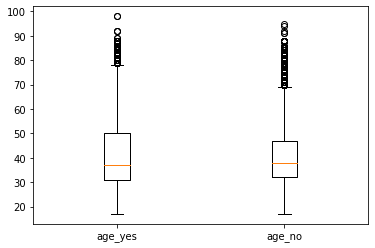

In [58]:
age_yes = data.loc[np.where(data['y']=='yes')[0],'age']
age_no = data.loc[np.where(data['y']=='no')[0],'age']

d = [age_yes, age_no]
plt.boxplot(d, labels = ['age_yes', 'age_no'])

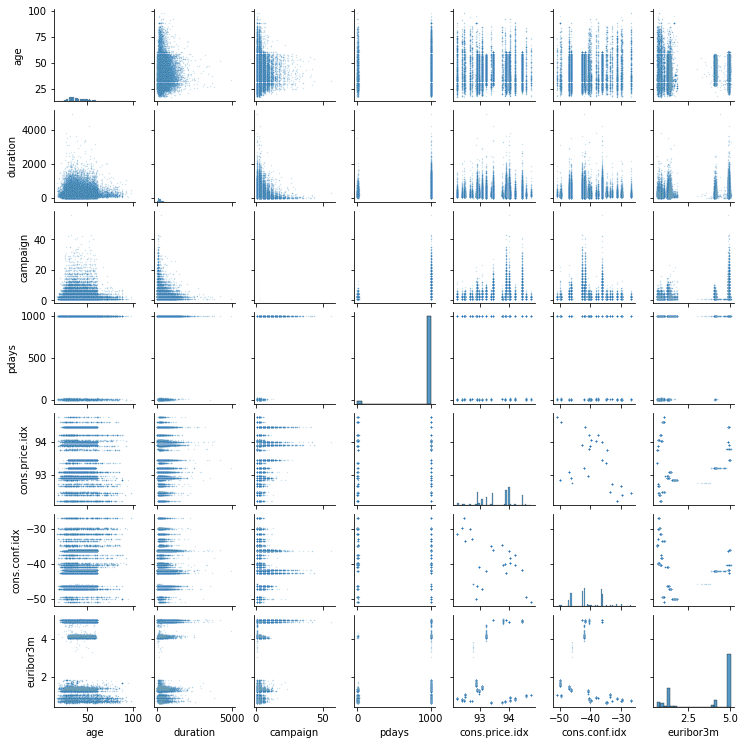

In [59]:
import seaborn as sns
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = data.select_dtypes(include="number").nunique() >= 25
df_continuous = data[cols_continuous[cols_continuous].index]

sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2});

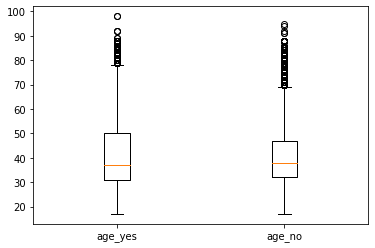

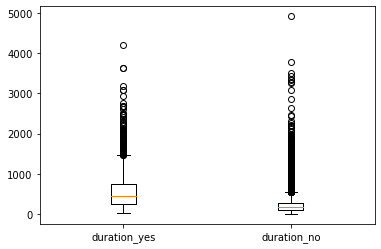

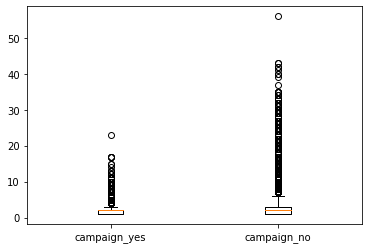

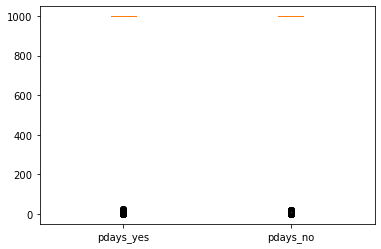

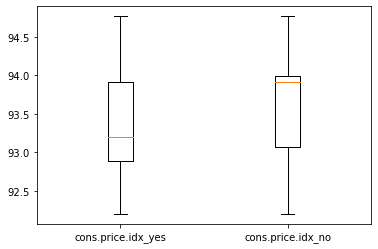

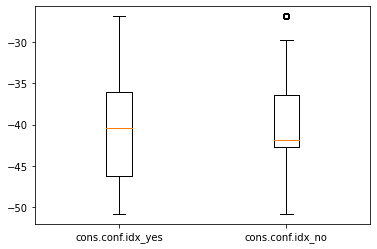

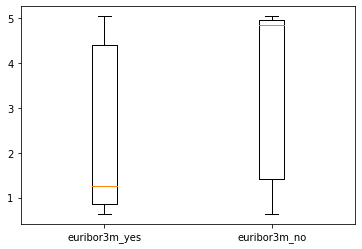

In [73]:

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_continuous.columns, axes.ravel()):
    field_yes = data.loc[np.where(data['y']=='yes')[0], col]
    field_no = data.loc[np.where(data['y']=='no')[0], col]

    d = [field_yes, field_no]
    plt.boxplot(d, labels = [f"{col}_yes", f"{col}_no"])
    plt.show()

# from the plots, duration, consumer price index, and euribor 3 month rate seem very relevant 

In [92]:
list(data)


['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [134]:
data['emp.var.rate']

0        1.1
1        1.1
2        1.1
3        1.1
4        1.1
        ... 
41183   -1.1
41184   -1.1
41185   -1.1
41186   -1.1
41187   -1.1
Name: emp.var.rate, Length: 41188, dtype: float64

In [94]:
# check unique values for each categorical field
cols_continuous = ['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']
df_categorical = data[cols_continuous]

for i in list(df_categorical):
    print(f"unique values for field {i} are: {np.unique(df_categorical[i])}")

unique values for field job are: ['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
unique values for field marital are: ['divorced' 'married' 'single' 'unknown']
unique values for field education are: ['basic.4y' 'basic.6y' 'basic.9y' 'high.school' 'illiterate'
 'professional.course' 'university.degree' 'unknown']
unique values for field default are: ['no' 'unknown' 'yes']
unique values for field housing are: ['no' 'unknown' 'yes']
unique values for field loan are: ['no' 'unknown' 'yes']
unique values for field contact are: ['cellular' 'telephone']
unique values for field month are: ['apr' 'aug' 'dec' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
unique values for field day_of_week are: ['fri' 'mon' 'thu' 'tue' 'wed']
unique values for field poutcome are: ['failure' 'nonexistent' 'success']


In [3]:
# lets impute missing values (unknwon) -- Python imputation is basic, I prefer to use R's MICE package for more complecated imputations
data = data.replace('unknown', np.nan)
data.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [4]:
# remove two of fields with least variation
data = data.drop(['poutcome', 'pdays'], axis = 1)

# convert categorical values with values
data['job'] = data['job'].replace({'admin.':1, 'blue-collar':2, 'entrepreneur':3, 'housemaid':4, 'management':5, 'retired':6,
 'self-employed':7, 'services':8, 'student':9, 'technician':10, 'unemployed':11})

data['marital'] = data['job'].replace({'divorced':1, 'married':2, 'single':3})

data['education'] = data['education'].replace({'basic.4y':1, 'basic.6y':2, 'basic.9y':3, 'high.school':4, 'illiterate':5, 'professional.course':6,
 'university.degree':7})

data['default'] = data['default'].replace({'yes':1, 'no':0})
data['housing'] = data['housing'].replace({'yes':1, 'no':0})
data['loan'] = data['loan'].replace({'yes':1, 'no':0})
data['contact'] = data['contact'].replace({'cellular':1, 'telephone':2})

data['month'] = data['month'].replace({'apr':1, 'aug':2, 'dec':3, 'jul':4, 'jun':5, 'mar':6, 'may':7, 'nov':8, 'oct':9, 'sep':10})

data['day_of_week'] = data['day_of_week'].replace({'fri':1, 'mon':2, 'thu':3, 'tue':4, 'wed':5})

data['y'] = data['y'].replace({'yes':1, 'no':0})


In [5]:
# impute missing values using KNN
# the proper way is of-course to divide data into a train and independant test set. Apply imputation on the train set
# and use the transform function to apply on the independant test set for validation purposes
# for the sake of this excersice and for simplicity (given there are not a lot of missing values within the data) I have applied the imputation on all data

# separate the outcome
y = data['y']
data = data.drop(['y'],axis = 1)

impute_fields = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'default', 'housing', 'loan']
impute_data = data[impute_fields]

from sklearn.impute import KNNImputer
impute_data = pd.DataFrame(np.round(KNNImputer(n_neighbors = 3).fit_transform(impute_data)), columns = impute_data.columns)

for i in impute_fields:
    data[i] = impute_data[i]
    
data.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [6]:
# convert back categories to make life easier for one-hot encoding

# convert categorical values with values
data['job'] = data['job'].replace({1:'admin.', 2:'blue-collar', 3:'entrepreneur', 4:'housemaid', 5:'management', 6:'retired',
 7:'self-employed', 8:'services', 9:'student', 10:'technician', 11:'unemployed'})

data['marital'] = data['job'].replace({1:'divorced', 2:'married', 3:'single'})

data['education'] = data['education'].replace({1:'basic.4y', 2:'basic.6y', 3:'basic.9y', 4:'high.school', 5:'illiterate', 6:'professional.course',
 7:'university.degree'})

data['contact'] = data['contact'].replace({1:'cellular', 2:'telephone'})

data['month'] = data['month'].replace({1:'apr', 2:'aug', 3:'dec', 4:'jul', 5:'jun', 6:'mar', 7:'may', 8:'nov', 9:'oct', 10:'sep'})

data['day_of_week'] = data['day_of_week'].replace({1:'fri', 2:'mon', 3:'thu', 4:'tue', 5:'wed'})


In [7]:
# dummify the categorical fields
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

fields = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week']
for feature in fields:
    data = encode_and_bind(data, feature)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=45)

In [10]:
train = pd.concat([X_train,y_train],axis = 1)
test = pd.concat([X_test,y_test],axis = 1)

In [12]:
from pycaret.classification import *
s = setup(train, target='y')
best = compare_models()
evaluate_model(best)
preds = predict_model(best, data = test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9107,0.9436,0.5211,0.6319,0.5704,0.5211,0.5246,3.0160
lightgbm,Light Gradient Boosting Machine,0.9083,0.9441,0.5328,0.6134,0.5698,0.5188,0.5207,0.3880
rf,Random Forest Classifier,0.9067,0.9374,0.4489,0.6271,0.5228,0.4727,0.4811,1.7590
lr,Logistic Regression,0.9044,0.9263,0.3723,0.6393,0.4701,0.4216,0.4405,2.4860
ada,Ada Boost Classifier,0.9020,0.9336,0.3610,0.6225,0.4562,0.4066,0.4253,0.8830
lda,Linear Discriminant Analysis,0.9017,0.9279,0.5259,0.5755,0.5492,0.4942,0.4950,0.3460
et,Extra Trees Classifier,0.9000,0.9143,0.3806,0.5968,0.4639,0.4118,0.4249,2.3940
ridge,Ridge Classifier,0.8995,0.0000,0.2801,0.6329,0.3877,0.3419,0.3761,0.0840
knn,K Neighbors Classifier,0.8978,0.8699,0.4602,0.5644,0.5064,0.4501,0.4533,0.6420
dummy,Dummy Classifier,0.8861,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0820


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9147,0.9450,0.5398,0.6455,0.5880,0.5408,0.5435
